In [1]:
from common.tools import Reddit
from common.translations import IO
import pandas as pd
from datetime import datetime as dt
import os

# Text pre-processing

In [2]:
r = Reddit()
r.subreddits

['SecurityAnalysis', 'StockMarket', 'wallstreetbets']

In [3]:
df = r.load_raw_text(os.path.join(r.filepath, r.subreddits[2]))
df.head()

,title,selftext
0,Life savings of 43k into UWMC - I have a crapp...,
1,Friendly Reminder: Inflation Rate,
2,This guy is definitely an ape 🦍,
3,🚀 GME Q1 Earnings Megathread - The Morning Aft...,Good Morning Everyone and happy 6/9 the 2nd!\n...
4,BlackBerry BB DD - Canada and Facebook Settlement,# This is not a financial advice. Don't be stu...


In [4]:
import re
import string

In [5]:
text = df.title.iloc[0]

In [6]:
def cleaning(text):
    text = text.lower()
    text = re.sub("\[.*\]", "", text)
    text = re.sub("\(.*\)", "", text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub("\w*\d\w*", "", text)
    text = re.sub("\s{2}", " ", text)
    text = text.encode("ascii", "ignore").decode("ascii") # removing emojis
    return text

In [7]:
df["title_cleaned"] = df.title.apply(lambda t: cleaning(t))
df["selftext_cleaned"] = df.selftext.apply(lambda t: cleaning(t))

In [8]:
df.head(50).style

,title,selftext,title_cleaned,selftext_cleaned
0,Life savings of 43k into UWMC - I have a crappy 2009 Honda Civic and want to buy a sports car,,life savings of into uwmc i have a crappy honda civic and want to buy a sports car,
1,Friendly Reminder: Inflation Rate,,friendly reminder inflation rate,
2,This guy is definitely an ape 🦍,,this guy is definitely an ape,
3,🚀 GME Q1 Earnings Megathread - The Morning After 💎🙌🚀,"Good Morning Everyone and happy 6/9 the 2nd! This will be the last GME Q1 Earnings thread, so please make the most out of it! Bull or bear, please be excellent to one another! Recent filings: #[GameStop Releases First Quarter 2021 Financial Results](https://investor.gamestop.com/news-releases/news-release-details/gamestop-releases-first-quarter-2021-financial-results) [GameStop Announces Appointments of Chief Executive Officer and Chief Financial Officer](https://investor.gamestop.com/news-releases/news-release-details/gamestop-announces-appointments-chief-executive-officer-and) #[8-K](https://investor.gamestop.com/node/18941/html), [8-K](https://investor.gamestop.com/node/18946/html), [10-Q](https://investor.gamestop.com/node/18951/html), [8-K](https://investor.gamestop.com/node/18956/html)",gme earnings megathread the morning after,good morning everyone and happy the this will be the last gme earnings thread so please make the most out of it bull or bear please be excellent to one another recent filings
4,BlackBerry BB DD - Canada and Facebook Settlement,"# This is not a financial advice. Don't be stupid. # Canada: It might surprise you but BB is a Canadian company 🇨🇦 . One thing all Canadian federal parties (LPC, CPC, BQ, NDP, GPC) have in common is ***they heavily support Canadian companies no matter what***. Not only that, people in Canada still reminiscent about BB and their role in Canadian history. [Here is CEO John Chen at Public Policy Forum in 2019 on why he chose to stay in Canada and the support he got from the federal Canadian Gov. I highly recommend you watch the whole section since it highly speaks of BB's culture. (0:53 - 4:18).](https://www.youtube.com/watch?v=_hQQlCWMrQA&t=53s) [Here is starting from the juicy part (1:53 - 4:18)](https://www.youtube.com/watch?v=_hQQlCWMrQA&t=113s) # Facebook Settlement: [Here is Bloomberg reporting in January 2021 that Facebook and BlackBerry has settled with no further details.](https://www.bloomberg.com/news/articles/2021-01-15/blackberry-and-facebook-are-in-process-of-global-settlement) 1. [CEO John Chen confirms their licensing negotiation involves the complete sale of the majority of BB's portfolio (@34:48)](https://www.youtube.com/watch?v=NQU7MHwJSAs&t=2088s) `Transcript:` `Michael Walkley -- Canaccord Genuity Group -- Analyst` `... Should you complete the sale, just the vast majority of your portfolio and you won't have any licensing revenue going forward? ...` `John Chen -- Executive Chairman and Chief Executive Officer` `Well, it's a major portion of our portfolio.` &#x200B; 2) [Deal involves one huge payment followed by a tail revenue and keeping IVY and QNX(36:53 - 38:09)](https://www.youtube.com/watch?v=NQU7MHwJSAs&t=2213s) `Transcript:` `Daniel Chan -- TD Securities -- Analyst` `Hi, John. Just a question about how you're hoping to structure the deal for the patent sale. Should we expect ongoing royalties to come from, maybe you get a portion of the licensing fees that you are -- that the buyer will take or is this more of a one-time deal?` `John Chen -- Executive Chairman and Chief Executive Officer` `There is a majority of the deal will come in one-time early, but there is a tail that goes on. I can't give you the details of this, but for multiple number of years.` `Daniel Chan -- TD Securities -- Analyst` `Okay, now you mentioned in the past that you've had offers for the entire portfolio. So what's different now that's making you consider selling it.` `John Chen -- Executive Chairman and Chief Executive Officer` `There re two reasons. Number one 

# Word tokenizing

In [9]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
stop_words = set(stopwords.words("english"))

In [11]:
df["title_tokens"] = df.title_cleaned.apply(lambda t: [token for token in word_tokenize(t) if token not in stop_words])

In [12]:
df.head(50).style

,title,selftext,title_cleaned,selftext_cleaned,title_tokens
0,Life savings of 43k into UWMC - I have a crappy 2009 Honda Civic and want to buy a sports car,,life savings of into uwmc i have a crappy honda civic and want to buy a sports car,,"['life', 'savings', 'uwmc', 'crappy', 'honda', 'civic', 'want', 'buy', 'sports', 'car']"
1,Friendly Reminder: Inflation Rate,,friendly reminder inflation rate,,"['friendly', 'reminder', 'inflation', 'rate']"
2,This guy is definitely an ape 🦍,,this guy is definitely an ape,,"['guy', 'definitely', 'ape']"
3,🚀 GME Q1 Earnings Megathread - The Morning After 💎🙌🚀,"Good Morning Everyone and happy 6/9 the 2nd! This will be the last GME Q1 Earnings thread, so please make the most out of it! Bull or bear, please be excellent to one another! Recent filings: #[GameStop Releases First Quarter 2021 Financial Results](https://investor.gamestop.com/news-releases/news-release-details/gamestop-releases-first-quarter-2021-financial-results) [GameStop Announces Appointments of Chief Executive Officer and Chief Financial Officer](https://investor.gamestop.com/news-releases/news-release-details/gamestop-announces-appointments-chief-executive-officer-and) #[8-K](https://investor.gamestop.com/node/18941/html), [8-K](https://investor.gamestop.com/node/18946/html), [10-Q](https://investor.gamestop.com/node/18951/html), [8-K](https://investor.gamestop.com/node/18956/html)",gme earnings megathread the morning after,good morning everyone and happy the this will be the last gme earnings thread so please make the most out of it bull or bear please be excellent to one another recent filings,"['gme', 'earnings', 'megathread', 'morning']"
4,BlackBerry BB DD - Canada and Facebook Settlement,"# This is not a financial advice. Don't be stupid. # Canada: It might surprise you but BB is a Canadian company 🇨🇦 . One thing all Canadian federal parties (LPC, CPC, BQ, NDP, GPC) have in common is ***they heavily support Canadian companies no matter what***. Not only that, people in Canada still reminiscent about BB and their role in Canadian history. [Here is CEO John Chen at Public Policy Forum in 2019 on why he chose to stay in Canada and the support he got from the federal Canadian Gov. I highly recommend you watch the whole section since it highly speaks of BB's culture. (0:53 - 4:18).](https://www.youtube.com/watch?v=_hQQlCWMrQA&t=53s) [Here is starting from the juicy part (1:53 - 4:18)](https://www.youtube.com/watch?v=_hQQlCWMrQA&t=113s) # Facebook Settlement: [Here is Bloomberg reporting in January 2021 that Facebook and BlackBerry has settled with no further details.](https://www.bloomberg.com/news/articles/2021-01-15/blackberry-and-facebook-are-in-process-of-global-settlement) 1. [CEO John Chen confirms their licensing negotiation involves the complete sale of the majority of BB's portfolio (@34:48)](https://www.youtube.com/watch?v=NQU7MHwJSAs&t=2088s) `Transcript:` `Michael Walkley -- Canaccord Genuity Group -- Analyst` `... Should you complete the sale, just the vast majority of your portfolio and you won't have any licensing revenue going forward? ...` `John Chen -- Executive Chairman and Chief Executive Officer` `Well, it's a major portion of our portfolio.` &#x200B; 2) [Deal involves one huge payment followed by a tail revenue and keeping IVY and QNX(36:53 - 38:09)](https://www.youtube.com/watch?v=NQU7MHwJSAs&t=2213s) `Transcript:` `Daniel Chan -- TD Securities -- Analyst` `Hi, John. Just a question about how you're hoping to structure the deal for the patent sale. Should we expect ongoing royalties to come from, maybe you get a portion of the licensing fees that you are -- that the buyer will take or is this more of a one-time deal?` `John Chen -- Executive Chairman and Chief Executive Officer` `There is a majority of the deal will come in one-time early, but there is a tail that goes on. I can't give you the details of this, but for multiple number of years.` `Daniel Chan -- TD Securities -- Analyst` `Okay, now you me

In [21]:
from nltk.probability import FreqDist

flatten = lambda nested_list: [elm for sublist in nested_list for elm in sublist]

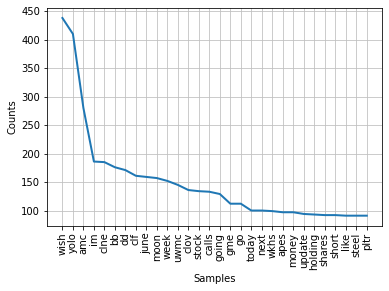

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
FreqDist(flatten(df.title_tokens)).plot(30)

## Bigram

In [31]:
df["bigrams"] = df.title_tokens.apply(lambda t: list(nltk.bigrams(t)))

In [32]:
df.head(50).style

,title,selftext,title_cleaned,selftext_cleaned,title_tokens,bigrams
0,Life savings of 43k into UWMC - I have a crappy 2009 Honda Civic and want to buy a sports car,,life savings of into uwmc i have a crappy honda civic and want to buy a sports car,,"['life', 'savings', 'uwmc', 'crappy', 'honda', 'civic', 'want', 'buy', 'sports', 'car']","[('life', 'savings'), ('savings', 'uwmc'), ('uwmc', 'crappy'), ('crappy', 'honda'), ('honda', 'civic'), ('civic', 'want'), ('want', 'buy'), ('buy', 'sports'), ('sports', 'car')]"
1,Friendly Reminder: Inflation Rate,,friendly reminder inflation rate,,"['friendly', 'reminder', 'inflation', 'rate']","[('friendly', 'reminder'), ('reminder', 'inflation'), ('inflation', 'rate')]"
2,This guy is definitely an ape 🦍,,this guy is definitely an ape,,"['guy', 'definitely', 'ape']","[('guy', 'definitely'), ('definitely', 'ape')]"
3,🚀 GME Q1 Earnings Megathread - The Morning After 💎🙌🚀,"Good Morning Everyone and happy 6/9 the 2nd! This will be the last GME Q1 Earnings thread, so please make the most out of it! Bull or bear, please be excellent to one another! Recent filings: #[GameStop Releases First Quarter 2021 Financial Results](https://investor.gamestop.com/news-releases/news-release-details/gamestop-releases-first-quarter-2021-financial-results) [GameStop Announces Appointments of Chief Executive Officer and Chief Financial Officer](https://investor.gamestop.com/news-releases/news-release-details/gamestop-announces-appointments-chief-executive-officer-and) #[8-K](https://investor.gamestop.com/node/18941/html), [8-K](https://investor.gamestop.com/node/18946/html), [10-Q](https://investor.gamestop.com/node/18951/html), [8-K](https://investor.gamestop.com/node/18956/html)",gme earnings megathread the morning after,good morning everyone and happy the this will be the last gme earnings thread so please make the most out of it bull or bear please be excellent to one another recent filings,"['gme', 'earnings', 'megathread', 'morning']","[('gme', 'earnings'), ('earnings', 'megathread'), ('megathread', 'morning')]"
4,BlackBerry BB DD - Canada and Facebook Settlement,"# This is not a financial advice. Don't be stupid. # Canada: It might surprise you but BB is a Canadian company 🇨🇦 . One thing all Canadian federal parties (LPC, CPC, BQ, NDP, GPC) have in common is ***they heavily support Canadian companies no matter what***. Not only that, people in Canada still reminiscent about BB and their role in Canadian history. [Here is CEO John Chen at Public Policy Forum in 2019 on why he chose to stay in Canada and the support he got from the federal Canadian Gov. I highly recommend you watch the whole section since it highly speaks of BB's culture. (0:53 - 4:18).](https://www.youtube.com/watch?v=_hQQlCWMrQA&t=53s) [Here is starting from the juicy part (1:53 - 4:18)](https://www.youtube.com/watch?v=_hQQlCWMrQA&t=113s) # Facebook Settlement: [Here is Bloomberg reporting in January 2021 that Facebook and BlackBerry has settled with no further details.](https://www.bloomberg.com/news/articles/2021-01-15/blackberry-and-facebook-are-in-process-of-global-settlement) 1. [CEO John Chen confirms their licensing negotiation involves the complete sale of the majority of BB's portfolio (@34:48)](https://www.youtube.com/watch?v=NQU7MHwJSAs&t=2088s) `Transcript:` `Michael Walkley -- Canaccord Genuity Group -- Analyst` `... Should you complete the sale, just the vast majority of your portfolio and you won't have any licensing revenue going forward? ...` `John Chen -- Executive Chairman and Chief Executive Officer` `Well, it's a major portion of our portfolio.` &#x200B; 2) [Deal involves one huge payment followed by a tail revenue and keeping IVY and QNX(36:53 - 38:09)](https://www.youtube.com/watch?v=NQU7MHwJSAs&t=2213s) `Transcript:` `Daniel Chan -- TD Securities -- Analyst` `Hi, John. Just a question about how you're hoping to structure the deal for the patent sale. Should we expect ongoing royalties to come from, maybe you get a por

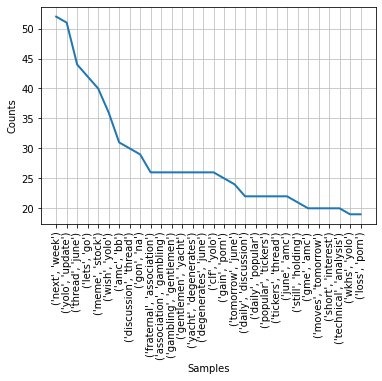

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
FreqDist(flatten(df.bigrams)).plot(30)

## Trigrams

In [35]:
df["trigrams"] = df.title_tokens.apply(lambda t: list(nltk.trigrams(t)))

In [37]:
df.head().style

,title,selftext,title_cleaned,selftext_cleaned,title_tokens,bigrams,trigrams
0,Life savings of 43k into UWMC - I have a crappy 2009 Honda Civic and want to buy a sports car,,life savings of into uwmc i have a crappy honda civic and want to buy a sports car,,"['life', 'savings', 'uwmc', 'crappy', 'honda', 'civic', 'want', 'buy', 'sports', 'car']","[('life', 'savings'), ('savings', 'uwmc'), ('uwmc', 'crappy'), ('crappy', 'honda'), ('honda', 'civic'), ('civic', 'want'), ('want', 'buy'), ('buy', 'sports'), ('sports', 'car')]","[('life', 'savings', 'uwmc'), ('savings', 'uwmc', 'crappy'), ('uwmc', 'crappy', 'honda'), ('crappy', 'honda', 'civic'), ('honda', 'civic', 'want'), ('civic', 'want', 'buy'), ('want', 'buy', 'sports'), ('buy', 'sports', 'car')]"
1,Friendly Reminder: Inflation Rate,,friendly reminder inflation rate,,"['friendly', 'reminder', 'inflation', 'rate']","[('friendly', 'reminder'), ('reminder', 'inflation'), ('inflation', 'rate')]","[('friendly', 'reminder', 'inflation'), ('reminder', 'inflation', 'rate')]"
2,This guy is definitely an ape 🦍,,this guy is definitely an ape,,"['guy', 'definitely', 'ape']","[('guy', 'definitely'), ('definitely', 'ape')]","[('guy', 'definitely', 'ape')]"
3,🚀 GME Q1 Earnings Megathread - The Morning After 💎🙌🚀,"Good Morning Everyone and happy 6/9 the 2nd! This will be the last GME Q1 Earnings thread, so please make the most out of it! Bull or bear, please be excellent to one another! Recent filings: #[GameStop Releases First Quarter 2021 Financial Results](https://investor.gamestop.com/news-releases/news-release-details/gamestop-releases-first-quarter-2021-financial-results) [GameStop Announces Appointments of Chief Executive Officer and Chief Financial Officer](https://investor.gamestop.com/news-releases/news-release-details/gamestop-announces-appointments-chief-executive-officer-and) #[8-K](https://investor.gamestop.com/node/18941/html), [8-K](https://investor.gamestop.com/node/18946/html), [10-Q](https://investor.gamestop.com/node/18951/html), [8-K](https://investor.gamestop.com/node/18956/html)",gme earnings megathread the morning after,good morning everyone and happy the this will be the last gme earnings thread so please make the most out of it bull or bear please be excellent to one another recent filings,"['gme', 'earnings', 'megathread', 'morning']","[('gme', 'earnings'), ('earnings', 'megathread'), ('megathread', 'morning')]","[('gme', 'earnings', 'megathread'), ('earnings', 'megathread', 'morning')]"
4,BlackBerry BB DD - Canada and Facebook Settlement,"# This is not a financial advice. Don't be stupid. # Canada: It might surprise you but BB is a Canadian company 🇨🇦 . One thing all Canadian federal parties (LPC, CPC, BQ, NDP, GPC) have in common is ***they heavily support Canadian companies no matter what***. Not only that, people in Canada still reminiscent about BB and their role in Canadian history. [Here is CEO John Chen at Public Policy Forum in 2019 on why he chose to stay in Canada and the support he got from the federal Canadian Gov. I highly recommend you watch the whole section since it highly speaks of BB's culture. (0:53 - 4:18).](https://www.youtube.com/watch?v=_hQQlCWMrQA&t=53s) [Here is starting from the juicy part (1:53 - 4:18)](https://www.youtube.com/watch?v=_hQQlCWMrQA&t=113s) # Facebook Settlement: [Here is Bloomberg reporting in January 2021 that Facebook and BlackBerry has settled with no further details.](https://www.bloomberg.com/news/articles/2021-01-15/blackberry-and-facebook-are-in-process-of-global-settlement) 1. [CEO John Chen confirms their licensing negotiation involves the complete sale of the majority of BB's portfolio (@34:48)](https://www.youtube.com/watch?v=NQU7MHwJSAs&t=2088s) `Transcript:` `Michael Walkley -- Canaccord Genuity Group -- Analyst` `... Should you complete the sale, just the vast majority of your portfolio and you won't have any licensing revenue going forward? ...` `John Chen -- Executive Chairman and Chief Executive Officer` `Wel

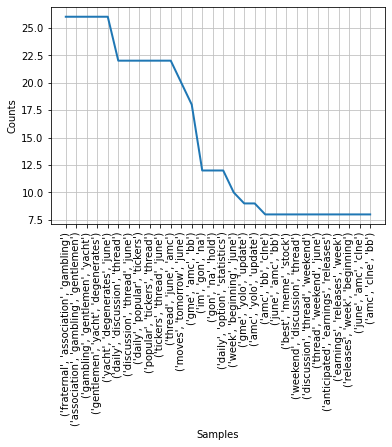

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [38]:
FreqDist(flatten(df.trigrams)).plot(30)

# Create DataFrames

In [ ]:
url = IO["BASE"] + IO["SUBR"]["STOCKMARKET"] + IO["LIST"]["HOT"]
print(url)

In [ ]:
#print(r.pretty(r.open(url)))
#print(r.open(url))

In [ ]:
df = r.get_threads(url)
df.head(2).style

In [ ]:
r.get_comments(IO["BASE"] + df.loc[0].permalink).head().style

# Persist Data

In [ ]:
url1 = IO["BASE"] +  IO["SUBR"]["WALLSTREETBETS"] + IO["LIST"]["HOT"]
url2 = IO["BASE"] +  IO["SUBR"]["STOCKMARKET"] + IO["LIST"]["HOT"]
url3 = IO["BASE"] +  IO["SUBR"]["SECURITYANALYSIS"] + IO["LIST"]["HOT"]

In [ ]:
r.bulk_store_threads(url, 20)

In [ ]:
df = r.load_threads()

In [ ]:
fp = os.path.join(os.getcwd(), "data")
x = os.listdir(fp)[-2]
x

In [ ]:
y = pd.read_pickle(os.path.join(fp, x))[["selftext", "title"]]

In [ ]:
y